# Texinomy prediction 

In [1]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./datasets/Doceree-HCP_Train.csv", encoding="latin-1")

In [3]:
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [4]:
df.shape

(113937, 14)

In [5]:
df.isna().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81624
IS_HCP                 1
dtype: int64

In [6]:
df["DEVICETYPE"].unique()

array(['Desktop', 'Mobile', 'Tablet', 'Unknown'], dtype=object)

In [7]:
df["PLATFORM_ID"].unique()

array([ 2,  3,  7,  5,  9,  6,  4, 10, 14, 12,  8, 15,  1, 13, 16])

In [8]:
df["BIDREQUESTIP"].unique().shape

(33664,)

In [9]:
df["USERPLATFORMUID"].unique()

array(['6974dcaa-f932-480e-9fb5-c52e20e1393a',
       'c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf',
       'a698de4b-e200-46dd-b5fb-40402175ae18', ...,
       '9c36e90c-caa7-4323-8431-fb84f8293972',
       'afc27760-31f7-4f6e-aa08-90d8a96525d0',
       'd26887c5-15f9-4b72-80dc-728039529e60'], dtype=object)

In [10]:
df["USERCITY"].unique()

array(['Portland', 'Arlington', 'New Meadows', ..., 'Texhoma', 'Goodhue',
       'Gambier'], dtype=object)

In [11]:
df["USERZIPCODE"].unique()

array([9.72060000e+04, 2.22020000e+04, 8.36540000e+04, ...,
       4.34500000e+04, 7.87356202e+08, 7.60865488e+08])

In [12]:
df["PLATFORMTYPE"].unique()

array(['Online Medical Journal', 'Online Learning Portal',
       'Medical News Platform', 'Electronic Health Record',
       'Tele-medicine Platform'], dtype=object)

In [13]:
df["CHANNELTYPE"].unique()

array(['Website'], dtype=object)

In [14]:
df["URL"].unique()

array(['https://www.cancertherapyadvisor.com/home/cancer-topics/prostate-cancer/',
       'https://www.cancertherapyadvisor.com/home/decision-support-in-medicine/hematology/marginal-zone-lymphoma/#',
       'https://globalrph.com/medcalcs/warfarin-maintenance-dose-consult-tool/',
       ...,
       'https://www.cureus.com/articles/89066-chronic-kidney-disease-presenting-with-brown-tumors-in-the-mandible',
       'https://www.medicalbag.com/?utm_source=newsletter&utm_medium=email&utm_campaign=NWLTR_MED_UPDT_071922_RM&hmEmail=tpE2adc6q79NrvlBxxlAR4bFgIvZ%2BFiA&hmSubId=&NID=1861578361',
       'https://radrounds.com/radiology-case-images-teaching-file/bilothorax/?fbclid=IwAR3Yw9WM9wiMWr1a1QPTfo4ktG3z5v7TJqCASTbHHi4jNub55m23gxSvsFg'],
      dtype=object)

In [15]:
df.duplicated().sum()

0

In [16]:
df["USERPLATFORMUID"].value_counts()

3e2578c8-f794-41af-a38c-c5cfb3c0f014    1447
d76f7c0b-1a64-4d4b-b36d-86c832be8837    1406
d00f28d6-3a50-46cd-92f3-8601bd57ad0e     675
fcd3d327-0ad5-425e-8ea8-33ffe6a31543     629
fe53f32c-4646-4abe-afea-90b21d6b8531     617
                                        ... 
6759cbf8-cf4f-4d0e-9eb8-00808e69e841       1
bd2007ca-d0b5-4620-8078-b7c6db62037c       1
0534212a-e0e9-49e7-ace9-608e0d0eae8a       1
26a06716-2716-4ac2-9131-fa0f01f84526       1
d26887c5-15f9-4b72-80dc-728039529e60       1
Name: USERPLATFORMUID, Length: 53780, dtype: int64

In [17]:
df["USERCITY"].value_counts()

New York          4943
Brooklyn          3237
St Louis          2545
Los Angeles       2154
Houston           1747
                  ... 
Foothill Ranch       1
Henrietta            1
Wartburg             1
Winfield             1
Gambier              1
Name: USERCITY, Length: 4420, dtype: int64

In [18]:
df["USERZIPCODE"].value_counts()

63169.0        2116
11226.0        1752
22202.0        1259
10001.0        1190
90060.0        1058
               ... 
56748.0           1
77021.0           1
74880.0           1
93630.0           1
760865488.0       1
Name: USERZIPCODE, Length: 11278, dtype: int64

In [19]:
df["URL"].value_counts()

https://www.clinicaladvisor.com/home/features/clinical-challenge/pain-tingling-and-limited-range-of-motion-after-a-cat-bite-to-the-finger/                                                                                                                                                                                                                                                                                                                                                                                   5310
https://www.gastroenterologyadvisor.com/                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [20]:
df["PLATFORM_ID"].value_counts()

2     79151
7     20913
9      3891
5      3230
6      2978
10     1037
4       745
14      725
12      544
3       479
8       130
15       42
1        40
13       31
16        1
Name: PLATFORM_ID, dtype: int64

<Axes: >

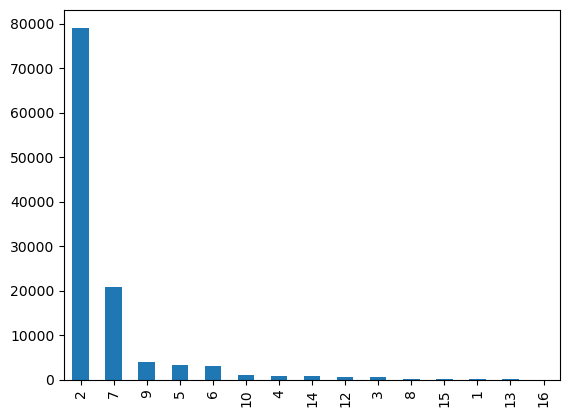

In [21]:
df["PLATFORM_ID"].value_counts().plot(kind="bar")

<Axes: >

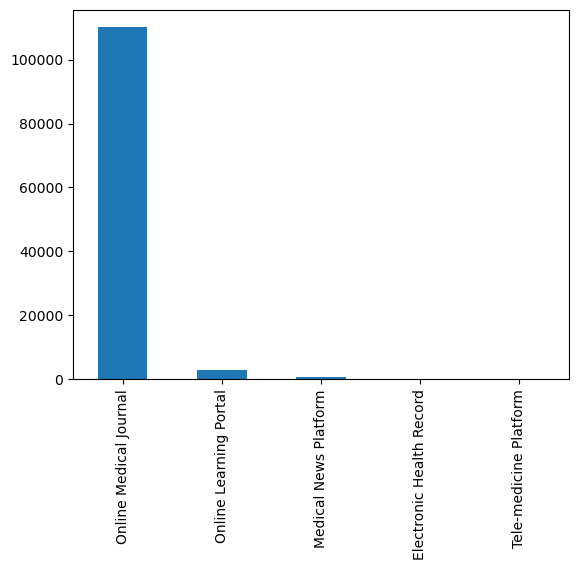

In [22]:
df["PLATFORMTYPE"].value_counts().plot(kind="bar")

In [23]:
df["KEYWORDS"].value_counts()

Family Practice|Drainage|Clinical|Dermatology|Ophthalmology|Medicine|Allergic|General|Diagnosis|Neurology|Hepatology|Health|Cardiovascular|Surgical|Psychiatry|Oral|Urology|Cardiology|Gastroenterology|Orthopedics|Erythema|Arthritis|Asthma|Cellulitis|Pediatrics|Surgery|False|Oncology|Rheumatology                                                                                                                                                                                                                                                                                                                                                                                                                                          5317
Transplantation|Technology|Chronic|Neoplasms|Urology|Pancreas|Mental Health|Arthritis|Refractory|Myocardial Infarction|Aged|Cardiology|Oncology|Surgical|Balloon|Anesthesia|Synthetic|Hepatic Transplantation|Diagnosis|Neurology|Ophthalmology|Surgery|Total|Atrial Fibrillation|

In [24]:
words = df["KEYWORDS"].str.split("|")

In [25]:
categories = []
for word_lst in words:
    for category in word_lst:
        if category not in categories:
            categories.append(category)

In [26]:
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [27]:
print(categories)

['General', 'Endocrine', 'False', 'Medicine', 'Surgery', 'Urology', 'Chronic', 'Gastroenterology', 'Neurology', 'Physicians', 'Diagnosis', 'Psychiatry', 'Lung', 'Clinical', 'Dermatology', 'Ophthalmology', 'Cardiovascular', 'Cardiology', 'Oncology', 'Rheumatology', 'Bone Marrow', 'Radiography', 'Intestine', 'Small Intestines', 'Salivary Glands', 'Autoimmune', 'Hemolytic', 'Hereditary', 'Total', 'Dendritic Cells', 'Biopsy', 'Large', 'Small', 'Lymphoid Tissue', 'B-Lymphocytes', 'Stomach', 'Transplantation', 'Gastrointestinal Tract', 'Intestines', 'Anemia', 'Refractory', 'Dental', 'Pharmacology', 'Health', 'Drug Therapy', 'Critical Care', 'Emergency Medicine', 'General Practice', 'Asthma', 'Neurological Surgery', 'Preventive', 'Trauma', 'Pathology', 'Nuclear Medicine', 'Orthopedics', 'Specialties', 'Technology', 'Resuscitation', 'Controlled', 'Respiratory Tract', 'Otolaryngology', 'Monocytes', 'Surgical', 'Aged', 'Rehabilitation', 'Molecular', 'Anesthesiology', 'Pediatrics', 'Newborn', 'Pa

In [28]:
myset = set(categories)
print(len(myset))

1614


In [29]:
print(len(categories))

1614


In [30]:
df["ID"].value_counts()

1001      1
76956     1
76967     1
76966     1
76965     1
         ..
38976     1
38975     1
38974     1
38973     1
114937    1
Name: ID, Length: 113937, dtype: int64

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
new_df = pd.read_csv("./datasets/Doceree-HCP_Train.csv", encoding="latin-1")
new_df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [33]:
df2=new_df.loc[:, new_df.columns.drop(['ID', 'USERPLATFORMUID', "CHANNELTYPE", "TAXONOMY"])]

In [34]:
df2.head()

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,IS_HCP
0,Desktop,2,170.173.0.22,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,0.0
1,Desktop,2,65.216.253.25,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,0.0
2,Desktop,2,66.232.79.22,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,0.0
3,Desktop,3,137.54.125.246,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,1.0
4,Mobile,7,174.202.231.99,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,0.0


In [35]:
df2.isna().sum()

DEVICETYPE         0
PLATFORM_ID        0
BIDREQUESTIP       0
USERCITY        6359
USERZIPCODE     4592
USERAGENT          2
PLATFORMTYPE       0
URL                0
KEYWORDS           0
IS_HCP             1
dtype: int64

In [36]:
df2.dropna(axis=0, subset=["USERAGENT"], inplace=True)

In [37]:
df2.isna().sum()

DEVICETYPE         0
PLATFORM_ID        0
BIDREQUESTIP       0
USERCITY        6358
USERZIPCODE     4591
USERAGENT          0
PLATFORMTYPE       0
URL                0
KEYWORDS           0
IS_HCP             1
dtype: int64

In [38]:
df2.dropna(axis=0, subset=["IS_HCP"], inplace=True)

In [39]:
df2.isna().sum()

DEVICETYPE         0
PLATFORM_ID        0
BIDREQUESTIP       0
USERCITY        6358
USERZIPCODE     4591
USERAGENT          0
PLATFORMTYPE       0
URL                0
KEYWORDS           0
IS_HCP             0
dtype: int64

In [40]:
df2["USERZIPCODE"].value_counts()

63169.0        2116
11226.0        1752
22202.0        1259
10001.0        1190
90060.0        1058
               ... 
56748.0           1
77021.0           1
74880.0           1
93630.0           1
760865488.0       1
Name: USERZIPCODE, Length: 11278, dtype: int64

In [41]:
df2["USERCITY"].value_counts()

New York          4943
Brooklyn          3237
St Louis          2545
Los Angeles       2154
Houston           1747
                  ... 
Foothill Ranch       1
Henrietta            1
Wartburg             1
Winfield             1
Gambier              1
Name: USERCITY, Length: 4420, dtype: int64

In [42]:
df2["LOCATION"] = df2["USERCITY"] + df2["USERZIPCODE"].astype(str)

In [43]:
df2.head()

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,IS_HCP,LOCATION
0,Desktop,2,170.173.0.22,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,0.0,Portland97206.0
1,Desktop,2,65.216.253.25,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,0.0,Arlington22202.0
2,Desktop,2,66.232.79.22,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,0.0,New Meadows83654.0
3,Desktop,3,137.54.125.246,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,1.0,NaN
4,Mobile,7,174.202.231.99,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,0.0,Houston77008.0


In [44]:
df2["LOCATION"].value_counts()

St Louis63169.0          2116
Brooklyn11226.0          1752
Arlington22202.0         1259
New York10001.0          1190
Los Angeles90060.0       1058
                         ... 
Kerman93630.0               1
Brooklyn112032012.0         1
Long Beach90805.0           1
Bellingham982721431.0       1
Pemberville43450.0          1
Name: LOCATION, Length: 10687, dtype: int64

In [45]:
df2["USERAGENT"].value_counts()

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36                                                      8380
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36                                                      5721
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36                                                      3868
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36                                                      3757
Mozilla/5.0 (iPhone; CPU iPhone OS 16_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Mobile/15E148 Safari/604.1                            3480
                                                                                                                                                      

In [46]:
browser = df2["USERAGENT"].str.split("/").apply(lambda x: x[0])

In [47]:
browser.value_counts()

Mozilla                     113899
facebookexternalhit             16
DoximityWebView                 14
Mediapartners-Google             4
Google-Calendar-Importer         1
Name: USERAGENT, dtype: int64

In [48]:
cats = df2["USERAGENT"].str.split("(").apply(lambda x: x[1] if len(x)>1 else x[0])

In [49]:
cats

0          Windows NT 10.0; Win64; x64) AppleWebKit/537.36 
1         Macintosh; Intel Mac OS X 10_15_7) AppleWebKit...
2         Macintosh; Intel Mac OS X 10_15_7) AppleWebKit...
3          Windows NT 10.0; Win64; x64) AppleWebKit/537.36 
4         iPhone; CPU iPhone OS 16_1_1 like Mac OS X) Ap...
                                ...                        
113932    Macintosh; Intel Mac OS X 10_15_6) AppleWebKit...
113933      Windows NT 6.1; Win64; x64) AppleWebKit/537.36 
113934    Macintosh; Intel Mac OS X 10_15_7) AppleWebKit...
113935    iPhone; CPU iPhone OS 15_6_1 like Mac OS X) Ap...
113936    iPhone; CPU iPhone OS 16_1 like Mac OS X) Appl...
Name: USERAGENT, Length: 113934, dtype: object

In [50]:
cats = cats.str.split(";")

In [51]:
cats

0         [Windows NT 10.0,  Win64,  x64) AppleWebKit/53...
1         [Macintosh,  Intel Mac OS X 10_15_7) AppleWebK...
2         [Macintosh,  Intel Mac OS X 10_15_7) AppleWebK...
3         [Windows NT 10.0,  Win64,  x64) AppleWebKit/53...
4         [iPhone,  CPU iPhone OS 16_1_1 like Mac OS X) ...
                                ...                        
113932    [Macintosh,  Intel Mac OS X 10_15_6) AppleWebK...
113933    [Windows NT 6.1,  Win64,  x64) AppleWebKit/537...
113934    [Macintosh,  Intel Mac OS X 10_15_7) AppleWebK...
113935    [iPhone,  CPU iPhone OS 15_6_1 like Mac OS X) ...
113936    [iPhone,  CPU iPhone OS 16_1 like Mac OS X) Ap...
Name: USERAGENT, Length: 113934, dtype: object

In [52]:
cats = cats.apply(lambda x: x[0])

In [53]:
cats

0         Windows NT 10.0
1               Macintosh
2               Macintosh
3         Windows NT 10.0
4                  iPhone
               ...       
113932          Macintosh
113933     Windows NT 6.1
113934          Macintosh
113935             iPhone
113936             iPhone
Name: USERAGENT, Length: 113934, dtype: object

In [54]:
cats = cats.apply(lambda x: x.split(" "))

In [55]:
cats = cats.apply(lambda x: x[0])

In [56]:
cats.value_counts()

Windows                                             48995
Macintosh                                           24983
iPhone                                              22717
Linux                                               11648
iPad                                                 2724
X11                                                  1984
KHTML,                                                710
Android                                               143
+http://www.facebook.com/externalhit_uatext.php)       16
Mediapartners-Google                                    4
iPod                                                    3
iPhone9,3                                               3
compatible                                              3
Google-Calendar-Importer                                1
Name: USERAGENT, dtype: int64

<Axes: >

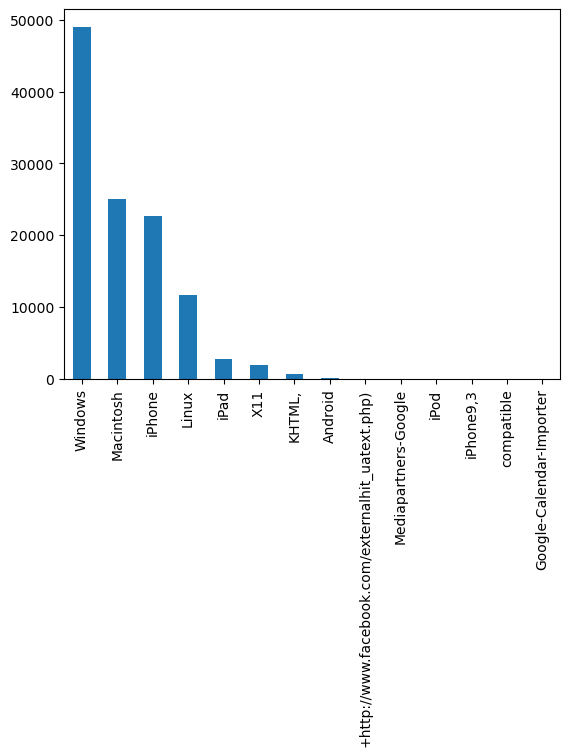

In [57]:
cats.value_counts().plot(kind='bar')

In [58]:
df2["USERAGENT"][0]

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'

In [59]:
import re
keywords = df2["USERAGENT"].apply(lambda x: re.findall(r"\s(.*?)/", x))

In [60]:
keywords[0]

['(Windows NT 10.0; Win64; x64) AppleWebKit',
 '(KHTML, like Gecko) Chrome',
 'Safari']

In [61]:
df2["USERAGENT"][1]

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Safari/605.1.15'

In [62]:
df2["USERAGENT"][2]

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Safari/605.1.15'

In [63]:
df2["USERAGENT"][4]

'Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Mobile/15E148 Safari/604.1'

In [64]:
cnt = 0
dup = df2["USERAGENT"].apply(lambda x: x if "AppleWebKit" in x else "")

In [65]:
dup

0         Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1         Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
2         Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
3         Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4         Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...
                                ...                        
113932    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...
113933    Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
113934    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
113935    Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...
113936    Mozilla/5.0 (iPhone; CPU iPhone OS 16_1 like M...
Name: USERAGENT, Length: 113934, dtype: object

In [66]:
len(dup)

113934

In [67]:
dup[0]

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'

In [68]:
dup

0         Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1         Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
2         Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
3         Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4         Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...
                                ...                        
113932    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...
113933    Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
113934    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
113935    Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...
113936    Mozilla/5.0 (iPhone; CPU iPhone OS 16_1 like M...
Name: USERAGENT, Length: 113934, dtype: object

In [69]:
url_types = df2["URL"].apply(lambda x: x.split("/")[2])

In [70]:
unique_urls = set(url_types)

In [71]:
unique_urls

{'allmedx.com',
 'consumer.healthday.com',
 'epainassist.com',
 'fpnotebook.com',
 'globalrph.com',
 'precisionmdapp.com',
 'radiopaedia.org',
 'radrounds.com',
 'uat.clinicaladvisor.com',
 'uat.clinicalpainadvisor.com',
 'www.2minutemedicine.com',
 'www.cancertherapyadvisor.com',
 'www.clinicaladvisor.com',
 'www.clinicalpainadvisor.com',
 'www.cureus.com',
 'www.dermatologyadvisor.com',
 'www.empr.com',
 'www.endocrinologyadvisor.com',
 'www.epainassist.com',
 'www.fpnotebook.com',
 'www.gastroenterologyadvisor.com',
 'www.goodrx.com',
 'www.grantsformedical.com',
 'www.h2hdigitalrx.com',
 'www.hematologyadvisor.com',
 'www.infectiousdiseaseadvisor.com',
 'www.medicalbag.com',
 'www.neurologyadvisor.com',
 'www.oncologynurseadvisor.com',
 'www.ophthalmologyadvisor.com',
 'www.optometryadvisor.com',
 'www.psychiatryadvisor.com',
 'www.pulmonologyadvisor.com',
 'www.rarediseaseadvisor.com',
 'www.renalandurologynews.com',
 'www.rheumatologyadvisor.com',
 'www.thecardiologyadvisor.com'}

In [72]:
for i in url_types:
    if "." in i:
        i = i.split(".")[1]

In [73]:
url_types

0         www.cancertherapyadvisor.com
1         www.cancertherapyadvisor.com
2         www.cancertherapyadvisor.com
3                        globalrph.com
4                       www.cureus.com
                      ...             
113932         www.clinicaladvisor.com
113933         www.clinicaladvisor.com
113934                  www.cureus.com
113935      www.dermatologyadvisor.com
113936              www.medicalbag.com
Name: URL, Length: 113934, dtype: object

In [74]:
new_lst = []
for i in unique_urls:
    matches = re.findall(r"\.(.*?)\.", i)
    new_lst.append(matches)

In [75]:
new_lst = [x for x in new_lst]

In [76]:
final_lst = []
for word in new_lst:
    if word != []:
        final_lst.append(word[0])
    

In [77]:
final_lst

['neurologyadvisor',
 'gastroenterologyadvisor',
 'pulmonologyadvisor',
 'optometryadvisor',
 'rheumatologyadvisor',
 'dermatologyadvisor',
 'infectiousdiseaseadvisor',
 'goodrx',
 'renalandurologynews',
 'endocrinologyadvisor',
 'thecardiologyadvisor',
 'empr',
 'ophthalmologyadvisor',
 'hematologyadvisor',
 'psychiatryadvisor',
 'clinicalpainadvisor',
 'medicalbag',
 'grantsformedical',
 'clinicalpainadvisor',
 'clinicaladvisor',
 'clinicaladvisor',
 'cancertherapyadvisor',
 'healthday',
 'h2hdigitalrx',
 'oncologynurseadvisor',
 '2minutemedicine',
 'fpnotebook',
 'rarediseaseadvisor',
 'cureus',
 'epainassist']

In [78]:
final_set = set(final_lst)

In [79]:
final_set

{'2minutemedicine',
 'cancertherapyadvisor',
 'clinicaladvisor',
 'clinicalpainadvisor',
 'cureus',
 'dermatologyadvisor',
 'empr',
 'endocrinologyadvisor',
 'epainassist',
 'fpnotebook',
 'gastroenterologyadvisor',
 'goodrx',
 'grantsformedical',
 'h2hdigitalrx',
 'healthday',
 'hematologyadvisor',
 'infectiousdiseaseadvisor',
 'medicalbag',
 'neurologyadvisor',
 'oncologynurseadvisor',
 'ophthalmologyadvisor',
 'optometryadvisor',
 'psychiatryadvisor',
 'pulmonologyadvisor',
 'rarediseaseadvisor',
 'renalandurologynews',
 'rheumatologyadvisor',
 'thecardiologyadvisor'}

In [80]:
len(final_set)

28

In [81]:
df2["URL"].value_counts()

https://www.clinicaladvisor.com/home/features/clinical-challenge/pain-tingling-and-limited-range-of-motion-after-a-cat-bite-to-the-finger/                                                                                                                                                                                                                                                                              5310
https://www.gastroenterologyadvisor.com/                                                                                                                                                                                                                                                                                                                                                                                4299
https://www.cureus.com/articles/105482-diverticulitis-with-microperforation                                                                                                   

In [82]:
cities = df2["USERCITY"].unique()

In [83]:
for i in cities:
    print(i)

Portland
Arlington
New Meadows
nan
Houston
Syracuse
Los Angeles
Dallas
Granada Hills
Davenport
Las Vegas
La Plata
Dearborn
Durham
Oscoda
Billerica
Columbus
Kansas City
New York
Denver
Rochester
Palm Beach Gardens
Westland
Minneapolis
Buena Park
Omaha
Oceanside
Lewiston
Kent
Somerville
Winter Park
Marietta
Amarillo
Milwaukee
Glen Ellyn
Martins Ferry
Kingman
Mineral Springs
Queens
Pittsburg
Nampa
Stone Mountain
Carteret
Owasso
Spokane
Chalfont
East Brunswick
Sheridan
Bountiful
Methuen
Baltimore
Osseo
Fort Wayne
Nelson
Newark
Chicago
Booneville
Candler
Brooklyn
Ludington
McKinleyville
Hamilton
Big Pine Key
Elyria
Greensburg
Philadelphia
St Louis
Morristown
Riverside
San Bernardino
Corpus Christi
Vallejo
Cleves
Brighton
Pilot Mountain
San Francisco
Hudson
San Antonio
Cheboygan
Wilton
South Bend
Idaho Falls
Pleasanton
Gastonia
Zionsville
Toms River
Saint Augustine
Mount Pleasant
Indianapolis
Buffalo
Crossville
Thousand Oaks
Sun City Center
Simpsonville
Lehigh Acres
Sebastian
Huntersville
At

In [84]:
df2.head()

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,IS_HCP,LOCATION
0,Desktop,2,170.173.0.22,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,0.0,Portland97206.0
1,Desktop,2,65.216.253.25,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,0.0,Arlington22202.0
2,Desktop,2,66.232.79.22,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,0.0,New Meadows83654.0
3,Desktop,3,137.54.125.246,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,1.0,NaN
4,Mobile,7,174.202.231.99,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,0.0,Houston77008.0


In [85]:
sample = df2.drop(columns=["BIDREQUESTIP", "USERCITY", "USERZIPCODE", "USERAGENT", "KEYWORDS", "LOCATION"])

In [86]:
sample.drop(columns=["URL"], inplace=True)

In [87]:
sample

,DEVICETYPE,PLATFORM_ID,PLATFORMTYPE,IS_HCP
0,Desktop,2,Online Medical Journal,0.0
1,Desktop,2,Online Medical Journal,0.0
2,Desktop,2,Online Medical Journal,0.0
3,Desktop,3,Online Medical Journal,1.0
4,Mobile,7,Online Medical Journal,0.0
...,...,...,...,...
113932,Desktop,2,Online Medical Journal,1.0
113933,Desktop,2,Online Medical Journal,1.0
113934,Desktop,7,Online Medical Journal,1.0
113935,Mobile,2,Online Medical Journal,1.0


In [88]:
sample["PLATFORMTYPE"].value_counts()

Online Medical Journal      110117
Online Learning Portal        2978
Medical News Platform          798
Electronic Health Record        40
Tele-medicine Platform           1
Name: PLATFORMTYPE, dtype: int64

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],remainder= 'passthrough')
[sample["DEVICETYPE"]] = ct.fit_transform([sample["DEVICETYPE"]])

In [90]:
sample.head()

,DEVICETYPE,PLATFORM_ID,PLATFORMTYPE,IS_HCP
0,1.0,2,Online Medical Journal,0.0
1,Desktop,2,Online Medical Journal,0.0
2,Desktop,2,Online Medical Journal,0.0
3,Desktop,3,Online Medical Journal,1.0
4,Mobile,7,Online Medical Journal,0.0


In [91]:
sample

,DEVICETYPE,PLATFORM_ID,PLATFORMTYPE,IS_HCP
0,1.0,2,Online Medical Journal,0.0
1,Desktop,2,Online Medical Journal,0.0
2,Desktop,2,Online Medical Journal,0.0
3,Desktop,3,Online Medical Journal,1.0
4,Mobile,7,Online Medical Journal,0.0
...,...,...,...,...
113932,Desktop,2,Online Medical Journal,1.0
113933,Desktop,2,Online Medical Journal,1.0
113934,Desktop,7,Online Medical Journal,1.0
113935,Mobile,2,Online Medical Journal,1.0


In [96]:
print(df["URL"].unique())

['https://www.cancertherapyadvisor.com/home/cancer-topics/prostate-cancer/'
 'https://www.cancertherapyadvisor.com/home/decision-support-in-medicine/hematology/marginal-zone-lymphoma/#'
 'https://globalrph.com/medcalcs/warfarin-maintenance-dose-consult-tool/'
 ...
 'https://www.cureus.com/articles/89066-chronic-kidney-disease-presenting-with-brown-tumors-in-the-mandible'
 'https://www.medicalbag.com/?utm_source=newsletter&utm_medium=email&utm_campaign=NWLTR_MED_UPDT_071922_RM&hmEmail=tpE2adc6q79NrvlBxxlAR4bFgIvZ%2BFiA&hmSubId=&NID=1861578361'
 'https://radrounds.com/radiology-case-images-teaching-file/bilothorax/?fbclid=IwAR3Yw9WM9wiMWr1a1QPTfo4ktG3z5v7TJqCASTbHHi4jNub55m23gxSvsFg']


In [98]:
import re


def getHostName(url):
    match = re.match(r"^(?:https?:\/\/)?(?:[^@\n]+@)?(?:www\.)?([^:\/\n]+)", url)
    if match:
        host_name = match.group(1)
        return host_name

In [99]:
df["hostname"] = df["URL"].apply(getHostName)

In [105]:
df["hostname"] = df["hostname"].apply(lambda x: x.split(".")[0])

In [111]:
df["hostname"].nunique()

41

In [114]:
df["hostname"].value_counts()

cureus                      20881
clinicaladvisor             15529
cancertherapyadvisor        10381
empr                         9182
rheumatologyadvisor          6786
renalandurologynews          6480
gastroenterologyadvisor      5925
2minutemedicine              3891
dermatologyadvisor           3705
neurologyadvisor             3579
fpnotebook                   3230
goodrx                       2978
psychiatryadvisor            2923
pulmonologyadvisor           2880
clinicalpainadvisor          2751
medicalbag                   2332
rarediseaseadvisor           1535
thecardiologyadvisor         1380
infectiousdiseaseadvisor     1124
grantsformedical             1037
globalrph                    1023
endocrinologyadvisor          846
allmedx                       745
consumer                      725
oncologynurseadvisor          704
hematologyadvisor             653
ophthalmologyadvisor          428
radrounds                     130
epainassist                    42
h2hdigitalrx  

In [116]:
df['hostname']

0         cancertherapyadvisor
1         cancertherapyadvisor
2         cancertherapyadvisor
3                    globalrph
4                       cureus
                  ...         
113932         clinicaladvisor
113933         clinicaladvisor
113934                  cureus
113935      dermatologyadvisor
113936              medicalbag
Name: hostname, Length: 113937, dtype: object